<a href="https://colab.research.google.com/github/dtvai00/exrercises/blob/main/%D0%A0%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87_%D0%BE%D1%82%D0%B1%D0%BE%D1%80%D0%BE%D1%87%D0%BD%D0%BE%D0%B3%D0%BE_%D1%8D%D1%82%D0%B0%D0%BF%D0%B0_(%D1%81%D1%82%D1%83%D0%B4%D0%B5%D0%BD%D1%82%D1%8B%2B%2C%20DL%20%D0%BE%D0%BB%D0%B8%D0%BC%D0%BF%D0%B8%D0%B0%D0%B4%D0%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Решения задач отборочного этапа II Олимпиады Deep Learning School по машинному обучению (студенты+)

## A. Хоровод

### Условие

100 учеников Deep Learning School устроили вечеринку, и на ней решили станцевать хоровод. Собираются они в хоровод так: в каждый момент времени соединяются две случайные свободные руки. При таком процессе иногда образуется кольцо — хоровод. Каково матожидание числа хороводов, которое получится, если продолжить этот процесс до тех пор, пока не останется свободных рук?

Обратите внимание, что две руки одного человека также могут соединиться в описанном процессе, и тогда получится хоровод из одного человека.
Если два ни с кем не связанных человека взялись за руки, то в рамках задачи они ведут себя также как один человек - у них есть две свободных руки. Чтобы избежать путаницы, будем называть их связанными компонентами.

### Решение

В таком процессе может возникать все два типа групп людей: цепочки и хороводы. В цепочке есть две свободных руки: в начала и в конце цепочки, а в хороводе свободных рук нет. Как цепочка, так и хоровод могут состоять из одного человека.

Пусть $N_i$, $M_i$ - соответственно число цепочек и хороводов на шаге $i$.
$N_0 = 100, \quad M_0 = 0$

Тогда на каждом шаге процесса есть всего два исхода:
- **A.** $N_{i+1}=N_i - 1, \quad M_{i+1}=M_i$ - две цепочки связались и стали одной цепочкой.
- **B.** $N_{i+1}=N_i - 1, \quad M_{i+1}=M_i + 1$ - цепочка связалась сама с собой и образовала хоровод.

Найдём вероятность исхода **B**. На начале шага свободно $2N_i$ рук, а после выбора первой руки $2N_i - 1$ рук. При этом только одна рука из оставшихся $2N_i-1$ принадлежит той же цепочке, что и первая. Поэтому вероятность образовать хоровод $P(B_i)=\frac{1}{2N_i - 1}$.

Тогда:
$$E[M_{i+1}] = E[M_{i}] + P(A_i) * 0 + P(B_i) * 1 = E[M_{i}] + \frac{1}{2N_i - 1}$$
$$E[M_{100}]=\sum_{i=1}^{100}\frac{1}{2N_i-1}=\sum_{i=1}^{100}\frac{1}{2(101 - i)-1}=\sum_{i=1}^{100}\frac{1}{2i-1}\approx3.28$$


## B. Регенерация матрицы ковариации

### Условие

Студент Миша три дня считал матрицу ковариации для своего курсача. Получив её, он аккуратно выписал результат на листок бумаги. Однако, почти сразу же случилась неприятность — Миша случайно пролил на листок кофе, и часть элементов матрицы размазалась. Восстановив значения по памяти, он с ужасом обнаружил, что полученная матрица больше не симметрична. Пересчитывать матрицу заново Мише было очень лень. Он решил не признаваться и найти ближайшую симметричную матрицу к своей испорченной матрице, используя норму Фробениуса как меру близости. Математическая постановка задачи:

Пусть $\hat{\Sigma} \in \mathbb{R}^{n\times n}$ — "испорченная" матрица ковариации, которая из-за кофейного инцидента потеряла свойство симметричности.

Требуется найти симметричную матрицу $\Sigma^*$, которая наиболее близка к $\hat{\Sigma}$ в смысле нормы Фробениуса:

$$\Sigma^*=\underset{\Sigma=\Sigma^T}{\mathrm{argmin}}\lVert\Sigma - \hat{\Sigma}\rVert^2_F$$
где $\lVert\cdot\rVert_F$​ обозначает норму Фробениуса.

Дана матрица:

$$
\hat{\Sigma}=\begin{bmatrix}
	0.36 & 0.5 & 0.14 \\
	0.4 & 0.4 & 0.9​ \\
	0.14 & 0.7 & 0.6​
\end{bmatrix}
$$

### Решение

По определению нормы Фробениуса:
$$\Sigma^*=\underset{\Sigma=\Sigma^T}{\mathrm{argmin}}\sum_{i,j}(\Sigma_{ij} - \hat{\Sigma}_{ij})^2$$
Преобразуем выражение воспользуясь тем, что $\Sigma$ - симметричная:

$$\sum_{i,j}(\Sigma_{ij} - \hat{\Sigma}_{ij})^2=\sum_{i}(\Sigma_{ii} - \hat{\Sigma}_{ii})^2+\sum_{i}\sum_{j>i}[(\Sigma_{ij} - \hat{\Sigma}_{ij})^2+(\Sigma_{ij} - \hat{\Sigma}_{ji})^2]$$
Каждую неизвестную переменную удалось выделить в отдельное не отрицательное слагаемое суммы, поэтому мы можем найти значение каждой переменной, решая задачу минимизации соответствующего слагаемого:
$$\Sigma_{ii}^*=\text{argmin}(\Sigma^*_{ii} - \hat{\Sigma}_{ii})^2=\hat{\Sigma}_{ii}$$
$$\Sigma_{ij}^*=\Sigma_{ji}^*=\text{argmin}[(\Sigma_{ij} - \hat{\Sigma}_{ij})^2+(\Sigma_{ij} - \hat{\Sigma}_{ji})^2], \quad j > i$$
Полученное для $\Sigma_{ij}$ выражение можно честно минимизировать, найдя его производные и приравняв их к нулю, или можно заметить, что это парабола $(x - a)^ 2+ (x-b)^2$ и её минимум равен $\frac{a+b}{2}$. Так или иначе:
$$\Sigma^*_{ii}=\hat{\Sigma}_{ii}$$
$$\Sigma^*_{ij}=\Sigma^*_{ji}=\frac{1}{2}(\hat{\Sigma}_{ij} + \hat{\Sigma}_{ji}), \quad j > i$$
Несложно заметить, что найденное решение можно представить в матричной форме:
$$\Sigma^*=\frac{1}{2}(\hat{\Sigma}+\hat{\Sigma}^T)$$

## C. Неоднозначный PCA

### Условие

Известно, что алгоритм PCA не всегда даёт однозначный ответ, потому что максимальный разброс может достигаться в проекции на несколько различных направляющих векторов. Дан набор данных из 201 точек в двумерном пространстве, $(x_i,x_i)\cup (x_i,-x_i),x_i \in \text{range}(-50, 51)$. Для этого набора данных обучили PCA с одной главной компонентой (`n_components=1` в библиотеке sklearn). Какое количество различных ответов могло получиться? Иными словами, найдите количество направлений, проекции точек датасета на которые имеют максимальный разброс. Направления, отличающиеся только знаком направляющего вектора, считаются различными.

### Решение

Необходимо найти все возможные единичные вектора $a$ (с точностью до знака), максимизирующие выборочную дисперсию данных вдоль вектора $a$.
$$a=\text{argmax}\frac{1}{m}\sum_{i=1}^m <a,X_i>^2=\text{argmax}\sum_{i=1}^m (a_0X_{i0}+a_1X_{i1})^2$$
$$=\text{argmax}[\sum_{x={-50}}^{50} (a_0x+a_1x)^2+\sum_{x={-50}}^{50} (a_0x-a_1x)^2]=$$
$$=\text{argmax}\sum_{x={-50}}^{50} [(a_0x+a_1x)^2+ (a_0x-a_1x)^2]=\text{argmax}\sum_{x={-50}}^{50} x^2(a_0^2+a_1^2)$$
Т. к. вектор $a$ - единичный, $a_0^2+a_1^2=1$. Получается, что выражение, которые мы пытаемся максимизировать, не зависит от $a$, так что $a$ имеет бесконечное количество возможных значений.

## D. Рекуррентный RNN

### Условие

Таня пытается обучить RNN сеть из одного рекуррентного слоя на задачу классификации последовательностей чисел. Она решила поэкспериментировать с архитектурой слоя, и придумала свою функцию активации вместо tanh. А еще у Тани нет GPU, поэтому она решила ограничить размер вектора скрытого состояния $h=1$. В итоге RNN Тани выражается следующей формулой:
$$h_t = f(W_{xh}x_t + W_{hh}h_{t-1})$$
Здесь
	$h=x=1$ (т. е. обе матрицы $W_{xh}$ и $W_{hh}$ имеют размер $(1\times1)$ )
	$f = \frac{1}{1+x}$
	$h_0=\epsilon, \quad \epsilon=1e-9$

После обучения оказалось, что $W_{hh} = 1,\quad W_{xh}=2$. Тане стало интересно, как ее RNN классифицирует последовательность чисел, состоящую из одного и того же числа $(с,с,с,с,...)$. Таня подала эту последовательность на вход своей RNN, и заметила, что после достаточно большого количества моментов времени $t$ выход RNN $h_t$ начал получаться всегда одинаковым: $1$. Потом Таня случайно пролила кофе на ноутбук, и в нем потерялась информация о том, из какого числа $с$ состояла последовательность. Помогите Тане восстановить $с$.

### Решение

Подставим в формулу из условия известные величины:
$$h_t =f(W_{xh}x_t + W_{hh}h_{t-1})=f(2c+h_{t-1})=\frac{1}{1+2c+h_{t-1}}$$
Мы также знаем, что с некоторого шага момента времени $k$ значение $h_t$ всегда равно 1, т. е. $1=h_k=h_{k+1}=h_{k+2}=...$

Воспользуемся рекуррентной формулой для $h_{k+1}$ и равенством $1=h_{k+1}=h_k$, чтобы получить уравнение:
$$h_{k+1}=\frac{1}{1+2c+h_k} \Rightarrow 1=\frac{1}{2c+2}$$
Решив его, найдём $c=-0.5$.


## E. Максимальное внимание

### Условие

Нина собирает свой трансформер для генерации геометрических конструкций для задач олимпиады. В качестве матриц que и key, выбирает единичные матрицы размерности 2 (так что $Q=K=V=X$), которые принимают на вход двумерный вектор, а затем вычисляются attention scores как:

$$\text{AttentionScores}(Q,K)=\text{softmax}(\frac{QK^T}{\sqrt{d}})$$
Откуда потом вычисляется значение
$$\text{Attention}(Q,K,V)=\text{softmax}(\frac{QK^T}{\sqrt{d}})V$$
Затем Нина запускает свою модель и на вход в self-attention приходят три токена с двумерными эмбеддингами:

$$
X = \begin{bmatrix} 1 & 0 \\ 0 & 1 \\ \cos{\theta} & \sin{\theta} \end{bmatrix}
$$
  
​​
Где $\theta∈[0,\pi/2]$. При каком $\theta$ третий токен будет иметь максимальное значение attention score от первого токена?

### Решение

Attention scores для трёх входных токенов - это матрица $A \in \mathbb{R}^{3\times3}$. Нам же нужно максимизировать значение $A_{1, 3}$.

Воспользуемся формулой из условия задачи, чтобы вычислить $A_{1,3}$. Важно заметить, что softmax принимается к матрице $\frac{QK^T}{\sqrt{d}}$ построчно.
$$A_{1,3}=\text{softmax}([\frac{Q_{1, 1}K_{1,1}+Q_{1, 2}K_{1,2}}{\sqrt{d}}, \frac{Q_{1, 1}K_{2,1}+Q_{1, 2}K_{2,2}}{\sqrt{d}}, \frac{Q_{1, 1}K_{3,1}+Q_{1, 2}K_{3,2}}{\sqrt{d}}])_3$$
Воспользуемся тем, что $Q=K=X, \quad d=2$ и упростим выражение.
$$A_{1,3}=\text{softmax}([\frac{X_{1, 1}X_{1,1}+X_{1, 2}X_{1,2}}{\sqrt{2}}, \frac{X_{1, 1}X_{2,1}+X_{1, 2}X_{2,2}}{\sqrt{2}}, \frac{X_{1, 1}X_{3,1}+X_{1, 2}X_{3,2}}{\sqrt{2}}])_3$$
Подставим значения входных токенов $X$.
$$A_{1,3}=\text{softmax}([\frac{1\cdot1+0\cdot0}{\sqrt{2}}, \frac{1\cdot0+0\cdot1}{\sqrt{2}}, \frac{1\cdot \cos{\theta}+0\cdot \sin{\theta}}{\sqrt{2}}])_3$$
$$A_{1,3}=\text{softmax}([\frac{1}{\sqrt{2}}, 0, \frac{\cos{\theta}}{\sqrt{2}}])_3$$
Раскроем softmax.
$$A_{1,3}=\frac{\text{exp}(\frac{\cos{\theta}}{\sqrt{2}})}{\text{exp}(\frac{1}{\sqrt{2}})+exp(0)+\text{exp}(\frac{\cos{\theta}}{\sqrt{2}})}$$
$$A_{1,3}=\frac{\text{exp}(\frac{\cos{\theta}}{\sqrt{2}})}{\text{exp}(\frac{1}{\sqrt{2}})+exp(0)+\text{exp}(\frac{\cos{\theta}}{\sqrt{2}})}$$
Можно заметить, что выражение вида $\frac{x}{a+x}$, где $a=e^{\frac{1}{\sqrt{2}}} + 1$ и $x=e^{\frac{\cos{\theta}}{\sqrt{2}}}$ положительны, монотонно возрастает, т. е. достигает своего наибольшего значения при наибольшем возможном значении $x$.
Так что $A_{1,3}$ достигает своего наибольшего значения вместе с $e^{\frac{\cos{\theta}}{\sqrt{2}}}$, т. е. при $\theta=2k\pi, k\in\mathbb{Z}$.
Вспомним, что в условии также дано ограничение $\theta \in [0, \frac{\pi}{2}]$ и останется только одно возможное решение $\theta=0$.

## F. Правильное ядро

### Условие
Дима играл с свертками и пытался собрать интересный узор из обычного квадрата.

Придумав свертку у него получилось из квадрата получить цветок (картинка 2) и он поделился своей находкой с другом Мишей. Однако, когда Миша попытался проделать это сам, вместо красивого узора он получил крест. “В чем же проблема?”, – расстроился Миша? “Ты ошибся ровно в одном параметре”, – ответил ему Дима.

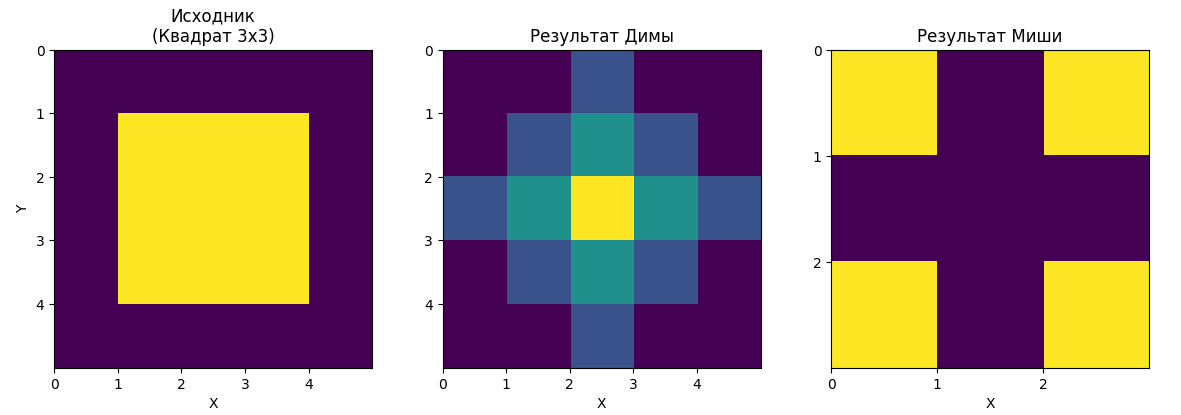

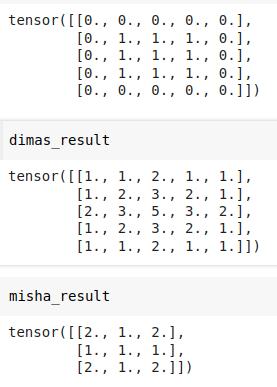

В каком параметре ошибся Миша?
#### Примечание
Миша знает, что у свертки есть несколько параметров, например, это сам kernel, это такие параметры как padding, dilation и другие. Когда Миша записывал сверточную операцию, он мог ошибиться в каком-то из этих параметров. Если он ошибся в kernel, то несмотря на размерность, отличие должно быть все равно только в 1 параметре.

### Решение

Первый этап решения - повторить результат Димы. Для этого найдём ядро свёртки и параметры свёртки.

$$
K = \begin{bmatrix}
1 & 0 & 1 \\
0 & 1 & 0 \\
1 & 0 & 1
\end{bmatrix}
$$

Параметры: `padding=1`, `stride=1`, `dilation=1`.

Тут подсказкой может стать то, что результат Димы положительный, целочисленный и в центре имеет число 5. Поэтому можно попробовать подобрать свёртку, состоящую из нулей и пяти единиц.

Следующий шаг - найти параметр, в котором ошибся Миша.

Миша получил матрицу размерности 3x3 в то время как Дима -  5x5. Такого уменьшения можно добиться за счёт изменения одного из трёх параметров:
- `padding=1` $\rightarrow$ `padding=0`
- `stride=1` $\rightarrow$ `stride=2`
- `dilation=1` $\rightarrow$ `dilation=2`

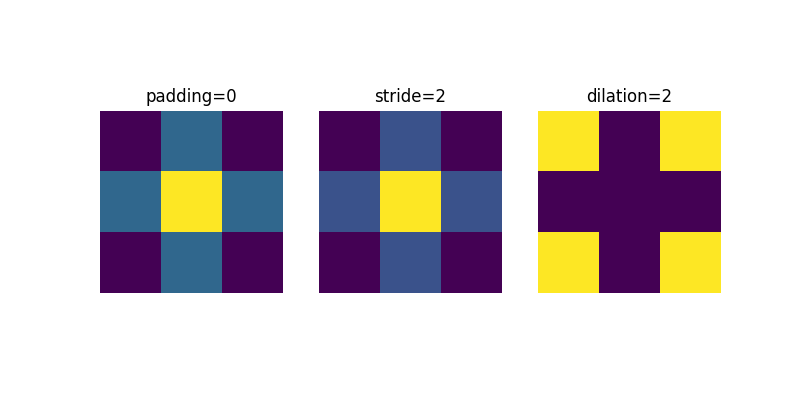

Результата Миши позволяет достичь изменение параметра `dilation`.

## G. Веса регрессии

### Условие

Таня решает задачу регрессии на датасете с двумя признаками с помощью алгоритма линейной регрессии с MSE loss, усреднённым по выборке. Формула выхода регрессии выглядит так:
$$\hat{y}=w_0 +w_1x_1 +w_2x_2$$
В датасете два элемента:

| $x_1$ | $x_2$ | $y$ |
| ----- | ----- | --- |
| 1     | -1    | 1   |
| -1    | 0     | 0   |

Перед обучением линейная регрессия выдает на эти элементы ответы
$$\hat{y_1}=1, \quad\hat{y_2}=2$$
Тане известны оптимальные значения параметров $(w_0,w_1,w_2)=(1,1,1)$. Однако ей также захотелось узнать, за сколько шагов градиентного спуска линейная регрессия придет к этим значениям параметров.

Таня инициализировала $(w_0,w_1,w_2)$ случайными значениями и запустила обучение линейной регрессии обычным градиентным спуском с learning rate $\alpha=0.5$. Оказалось, что оптимальные параметры были достигнуты ровно за один шаг обучения. Найдите значения, которыми были инициализированы $(w_0,w_1,w_2)$.

### Решение

Честно применим метод градиентного спуска.

Договоримся обозначать:
- Значения признаков как $x_{i, j}$, где $i$ - номер элемента в датасете, а $j$ - номер признака.
- Шаги обучения как $t$. Т. е. зависящие от шага переменные являются функциями от $t$. (e. g. $\hat{y_1}(t), \quad \hat{y_1}(0)=1$)

Функция ошибки модели:
$$L=\frac{1}{n}\sum^n_{i=1}(\hat{y}_i(t) -y_i)^2$$
Воспользуемся правилом дифференцирования сложной функции и найдём частные производные $\frac{d L}{d w_0}$, $\frac{d L}{d w_1}$, $\frac{d L}{d w_2}$:

$$\frac{dL}{d w_k}=\sum^n_{i=1}\frac{dL}{d\hat{y_i}}\frac{d\hat{y_i}}{d w_k}$$
$$\frac{dL}{d \hat{y_i}}=\frac{2}{n}(\hat{y_i} - y_i)$$
$$\frac{d \hat{y_i}}{d w_0}=1$$
$$\frac{d \hat{y_i}}{d w_1}=x_{i, 1}$$
$$\frac{d \hat{y_i}}{d w_2}=x_{i,2}$$
$$\frac{d L}{d w_0}=\frac{2}{n}\sum^n_{i=1}(\hat{y}_i-y_i)$$
$$\frac{d L}{d w_1}=\frac{2}{n}\sum^n_{i=1}(\hat{y}_i-y_i)x_{i,1}$$
$$\frac{d L}{d w_2}=\frac{2}{n}\sum^n_{i=1}(\hat{y}_i-y_i)x_{i,2}$$
Теперь можем написать формулу обновления весов:
$$w_i(t+1)=w_i(t)-\alpha\frac{dL}{dw_i}(t)$$
Нам известны веса на шаге $t=1$, а найти нам нужно веса на шаге $t = 0$. Подставим известные веса в формулу обновления весов и получим систему уравнений.
$$
\begin{cases}
w_0(1)=w_0(0)-\frac{2\alpha}{n}\sum^n_{i=1}(\hat{y}_i(0)-y_i) \\
w_1(1)=w_1(0)-\frac{2\alpha}{n}\sum^n_{i=1}(\hat{y}_i(0)-y_i)x_{i,1} \\
w_2(1)=w_2(0)-\frac{2\alpha}{n}\sum^n_{i=1}(\hat{y}_i(0)-y_i)x_{i,2} \\
\end{cases}
$$
Выразим веса в момент времени $t=0$ и подставим известные нам величины $x_{i,j}$, $y_i$, а также  $\alpha$, $w_i(1)$, $\hat{y_i}(0)$.

$$
\begin{cases}
w_0(0)=w_0(1)+\frac{2\alpha}{n}[(\hat{y}_1(0)-y_1)+(\hat{y}_2(0)-y_2)] \\
w_1(0)=w_1(1)+\frac{2\alpha}{n}[(\hat{y}_1(0)-y_1)x_{1,1}+(\hat{y}_2(0)-y_2)x_{2,1}] \\
w_2(0)=w_2(1)+\frac{2\alpha}{n}[(\hat{y}_1(0)-y_1)x_{1,2}+(\hat{y}_2(0)-y_2)x_{2,2}] \\
\end{cases}
$$
$$
\begin{cases}
w_0(0)=1+\frac{2\cdot0.5}{2}[(1-1)+(2-0)] \\
w_1(0)=1+\frac{2\cdot0.5}{2}[(1-1)\cdot1+(2-0)\cdot(-1)] \\
w_2(0)=1+\frac{2\cdot0.5}{2}[(1-1)\cdot(-1)+(2-0)\cdot0] \\
\end{cases}
$$
Выполнив операции в правой части равенств получим:

$$
\begin{cases}
w_0(0)=2 \\
w_1(0)=0 \\
w_2(0)=1 \\
\end{cases}
$$

## H. Странные функции активации

### Условие
Однажды, в известной технической компании, ответственный за один очень важный проект сотрудник Дмитрий обнаружил, что его стажер забыл добавить центрирование после выхода маленького слоя нейронной сети. До запуска проекта осталось всего два часа и нужно экстренно посчитать среднее выхода из этого слоя и добавить в код, так как иначе эта маленькая деталь сломает весь проект. Схема нашей сети такая: на вход с прошлых слоев подаются две величины $\xi$ и $\eta$. Величина $\xi$ входит сначала в ReLU, а выход из ReLU уже подается в sigmoid и получается $y_1$​. Величина $\eta$ входит сначала в ReLU, а выход из ReLU уже подается в функцию $x\cdot \ln(1+e^x)$ и получается $y_2$​. Далее вычисляется $y_2−y_1$​ и подается в последующие слои.

Известно, что величины $\xi$ и $\eta$ распределены стандартно нормально. Требуется вычислить математическое ожидание $y_2−y_1$​ и предоставить это в качестве ответа.

### Решение

$$y_1=\sigma(x_1)=\frac{1}{1+e^{-x_1}}, \quad x_1=\text{ReLU}(\xi)$$
$$y_2=\text{Swish}(x_2)=x_2(1+e^{x_2}), \quad x_2=\text{ReLU}(\eta)$$
$$
ReLU(x) = \begin{cases}
0, \quad x <0 \\
x, \quad x \ge 0
\end{cases}
$$
Заметим, что случайные величины $\xi$ и $\eta$, а как следствие $y_1$ и $y_2$, попарно независимы.

Мат. ожидание разности независимых случайных величин можно найти как разность их мат. ожиданий:
$$E[y_2-y_1]=E[y_2]-E[y_1]$$
Нам известны зависимости $y_1(\xi)$ и $y_2(\eta)$, а также распределения случайных величин $\xi$ и $\eta$, поэтому мы можем вычислить мат. ожидания по формуле для непрерывных случайных величин: $E[x]=\overset{+\infty}{\underset{-\infty}{\int}}x f(x)dx$, где $f(x)$ - плотность распределения случайной величины $x$. Т. к. $\xi$ и $\eta$ распределены стандартно нормально, далее будем обозначать их плотность распределения как $f(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$.
$$E[y_1]=\overset{+\infty}{\underset{-\infty}{\int}}y_1(\xi)f(\xi)d\xi=\overset{+\infty}{\underset{-\infty}{\int}}\sigma(\text{ReLU}(\xi))f(\xi)d\xi=\overset{0}{\underset{-\infty}{\int}}\sigma(0)f(\xi)d\xi + \overset{+\infty}{\underset{0}{\int}}\sigma(\xi)f(\xi)d\xi=$$
$$=0.5\cdot\overset{0}{\underset{-\infty}{\int}}f(\xi)d\xi + \overset{+\infty}{\underset{0}{\int}}\sigma(\xi)f(\xi)d\xi=0.25+\overset{+\infty}{\underset{0}{\int}}\sigma(\xi)f(\xi)d\xi$$
$$E[y_2]=\overset{+\infty}{\underset{-\infty}{\int}}y_2(\eta)f(\eta)d\eta=...=\overset{0}{\underset{-\infty}{\int}}0\cdot\ln(1+e^0)f(\eta)d\eta + \overset{+\infty}{\underset{0}{\int}}\eta\cdot\ln(1+e^\eta)f(\eta)d\eta=$$
$$=\overset{+\infty}{\underset{0}{\int}}\eta\cdot\ln(1+e^\eta)f(\eta)d\eta$$
$$E[y_2-y_1]=E[y_2]-E[y_1]=\overset{+\infty}{\underset{0}{\int}}\eta\cdot\ln(1+e^\eta)f(\eta)d\eta-0.25-\overset{+\infty}{\underset{0}{\int}}\sigma(\xi)f(\xi)d\xi=$$
$$=-0.25+\overset{+\infty}{\underset{0}{\int}}(x\cdot\ln(1+e^x)-\sigma(x))f(x)dx=-0.25+\frac{1}{\sqrt{2\pi}}\overset{+\infty}{\underset{0}{\int}}e^{-\frac{x^2}{2}}(x\cdot\ln(1+e^x) - \frac{1}{1+e^{-x}}) $$
$$=\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}\ln(1+e^x)\bigg|_0^{+\infty}-0.25\approx0.0265$$


## I. Продажи в гипермаркете

### Условие
Однажды вечером Лера пошла в магазин перед самым закрытием, чтобы купить себе невероятный сливочный йогурт. Она увидела, что один из сотрудников магазина сканировал товар на полках. Ей стало интересно, почему это происходит, и она решила поискать это в интернете, вернувшись домой. Лера узнала, что сотрудники магазинов регулярно проводят инвентаризацию. Вот зачем это делается:

Для увеличения продаж. Если товара нет на полке, клиент не купит его;
Для снижения потерь. Из-за нехватки товара магазин теряет прибыль;
Для улучшения лояльности. Покупатели разочаровываются, если не находят нужный товар;
Для оптимизации логистики. Автоматическое пополнение полок и предотвращение "ручного" переучета;
Для анализа спроса. Выявление популярных товаров и корректировка ассортимента.
"Да это же задача о мультиклассовой классификации!" — подумала Лера и решила провести вечер за великолепным йогуртом и задачей машинного обучения.

#### Формат ввода
[Ссылка на данные](https://drive.google.com/drive/folders/1aq_CYIB8OyBDLOO5qJKFfrrcHkHdtIti?usp=sharing)

Вам даны тренировочная и тестовая выборка с данными о продажах. Тренировочная выборка содержит следующие столбцы:

- date – дата и время (часовая гранула);
- product – id товара;
- category – id категории;
- stock – остаток товара на складе;
- sales - количество проданных единиц товара;
- discount - скидка на товар;
- price - цена товара;
- cheques_last_sale - количество уникальных чеков с момента последней продажи товара;
- hours_last_sale - часов с момента последней продажи товара;
- target - целевая переменная наличия или отсутствия товара (3 класса).

Целевая переменная может принимать следующие значения:
- 0 – не проверялся (по любым причинам этого не сделали);
- 1 – проверен, есть на полке;
- 2 – проверен – нет на полке.

#### Формат вывода
Тестовая выборка содержит все те же столбцы, кроме целевой переменной. Ваша задачка — обучить модель машинного обучения на тренировочных данных и предсказать наш target. В качестве решения вам нужно отправить ответы на тестовой выборке.
- [Пример формата решения](https://drive.google.com/file/d/1jNV3zLFkntQsYYWUr3SVSaVKQ8W_XbVj/view?usp=sharing)
- [Опорный файл для решения. Бейзлайн](https://drive.google.com/file/d/1z8ylsebKLoV8DQjpDhSKsqddzBbF7Gm4/view?usp=drive_link)

#### Примечания
Ваши решения будут оцениваться как задача классификации по метрике macro_avg_recall.

### Решение
[Ссылка на решение]()

## J. Справедливая оплата

### Условие
Артём ценит свой труд и стремится к тому, чтобы получать за него достойную оплату. За прошедший год он заметил, что сильно профессионально вырос и решил найти новую работу. Когда он начал искать подходящую вакансию, то заметил, что бОльшая часть работодателей не указывали даже минимальную оплату труда, оставляя эту графу в вакансии пустой. Артём не зря поступил в технический университет и проходил курсы по глубокому обучению от DLS: он быстро нашел выход в решении задачи по NLP.

#### Формат ввода
- [Ссылка на тренировочные данные](https://disk.yandex.ru/d/Ca9c54PwzAfddA)
- [Ссылка на тестовые данные](https://disk.yandex.ru/d/43DYcVXkX7Ju1Q)

Вам даны тренировочная и тестовая выборки. Тренировочная выборка содержит следующие столбцы:
- Ids — идентификатор вакансии;
- Employer — работодатель;
- Name — название вакансии;
- Salary — целелвая переменная принимает значение минимальной зарплаты;
- Experience — опыт работы;
- Schedule — график работы;
- Keys — ключевые навыки;
- Description — описание вакансиии.

#### Формат вывода
Тестовая выборка содержит все те же столбцы, кроме целевой переменной. Ваша задача — обучить модель машинного обучения на тренировочных данных и предсказать величину Salary для тестовых данных. В качестве решения нужно отправить ответы модели на тестовой выборке. Пример файла ответа можно найти по [ссылке](https://disk.yandex.ru/d/8C8vCvOhVH3MXA).

Также, чтобы вам было проще приступить к задаче мы подготовили [бейзлайн](https://disk.yandex.ru/d/X99-uZu-RUlR2Q).

#### Примечания
Ваше решение будет оцениваться как задача регрессии по метрике RMSE.

### Решение
[Ссылка на решение](https://colab.research.google.com/drive/1fstkgwGSD3C2Ku20Y7PkRMVRxpjs9tl4?usp=sharing)

# K. Некрасивый маркетплейс

### Условие

Артём во всем любит красоту и функциональность. А еще он очень любит своего черного кота. Однажды вечером он решил зайти на маркетплейс, чтобы порадовать своего пушистика новой игрушкой, но в результате только расстроился. Все картинки на витрине интернет-магазина были с разноцветными фонами и надписями! А что может быть лучше товара на простом белом фоне?

Артём решил разобраться с этим и создать алгоритм, который бы не допускал публикации изображений со сложным фоном. Выглядит как задача по Computer vision.

#### Формат ввода
[Ссылка на данные](https://disk.yandex.ru/d/3492n9I9nNNqgQ)

Данные представляют из себя изображения c маркетплейса. В файле train.csv указаны правильные ответы: есть фон на изображении или нет.Вам необходимо поработать с изображениями, которые лежат в папке test и их перечень по наименованиям лежит в соответствующем файле к которму и нужно сделать предсказание класса.

#### Формат вывода
Вам необходимо послать в соревнование файл submission.csv, k+1-ая строка которого будет содержать флаг наличия или отсутствия фона k.jpg. Нулевая строка должна содержать название колонки. Файл sample_submission.csv представляет из себя пример посылки. Файл test.csv содержит список тестовых изображений в том порядке, в котором необходимо перечислить ответы для них в submission.csv

#### Примечания
Метрика оценки качества — обычная Accuracy!

### Решение

[Ссылка на решение](https://colab.research.google.com/drive/1VV1phoch-yGnMQG2LpvxszsxPqDDuL49?usp=sharing)